<a href="https://colab.research.google.com/github/Codefedy/Heart-Disease-Predictive-Model/blob/main/Copy_of_Untitled12.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install notebook

In [ ]:
import numpy as np
import pandas as pd

import seaborn as sns #for plotting

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, auc #for model evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression

In [144]:
from sklearn.ensemble import RandomForestClassifier #for the model

In [ ]:
from sklearn.feature_selection import mutual_info_classif


In [145]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
import pydot

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.metrics import accuracy_score

In [146]:
from sklearn.tree import export_graphviz #plot tree

In [147]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:

!pip install mlxtend

In [ ]:
from mlxtend.plotting import plot_decision_regions

In [ ]:
from sklearn.metrics import confusion_matrix #for model evaluation


In [ ]:
from sklearn.metrics import classification_report #for model evaluation

In [ ]:
!pip install eli5 #for purmutation 

In [ ]:
import eli5


In [ ]:
from eli5.sklearn import PermutationImportance

In [ ]:
pip install shap #for SHAP values


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import shap

In [ ]:
shap.initjs()


In [ ]:
from sklearn.model_selection import train_test_split #for data splitting

In [ ]:
!pip install --upgrade pip

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install --upgrade matplotlib==3.1.1 

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
!pip install pdpbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from pdpbox import pdp, info_plots #for partial plots

In [ ]:
np.random.seed(123) #ensure reproducibility

In [ ]:
pd.options.mode.chained_assignment = None  #hide any pandas warnings

In [ ]:
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
dp = pd.read_csv('/content/drive/My Drive/UWE-ML/HD_Prediction.csv')

In [ ]:
dp.head(6)

,index,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence
5,5,65,1,4,120,177,0,0,140,0,0.4,1,0,7,Absence


Let's clean the data to better understand the analysis and naming conventions. (Also see interpretation for terminologies).
sex will be assigned (1 = male, 0 =female)
Chest pain type (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
BP is the blood pressure rate of the individual.
Fbs over 120: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
EKG Result: will be assigne restEKG which means Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
MAX HR will be assigned "Maximum heart rate".
Exercise angina: Exercise induced angina (1 = yes; 0 = no). This means chest pain or tightness induced by excercise
ST DEPRESSION:Induced by exercise relative to rest ('ST' relates to positions on the EKG plot).
Slope of ST: The peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping).
Number of vessels fluro: This feature represents a discrete value indicating the count of vessels. For example, it could range from 0 (indicating no vessels colored) to 3 (indicating all three major vessels colored). Each vessel represents a major coronary artery: the left anterior descending (LAD), the left circumflex (LCX), and the right coronary artery (RCA).
Thallium: A toxic heavy metal that can have adverse effects on various organs and systems in the body if ingested or exposed to in large amounts.
Heart Disease: This will be the target to identify persons with or without heart disease. This is represented with "Presence" or "Absence".

Lets improve the analysis interpretation by changing the values of the
categorical vaiables.

In [ ]:
dp = dp.drop(dp.columns[0], axis=1)

In [ ]:
dp.columns = ['age', 'sex', 'chest_pain_type', 'resting_blood_pressure', 'cholesterol', 'fasting_blood_sugar', 'rest_ekg', 'max_heart_rate',
       'exercise_angina', 'st_depression', 'slope_of_ST', 'num_major_vessels', 'thallium', 'target(HeartDisease)']

In [ ]:
le = LabelEncoder()
dp['target(HeartDisease)'] = le.fit_transform(dp['target(HeartDisease)'])


Changing the values of categorical variables to improve interpretation

In [ ]:
dp['sex'][dp['sex'] == 'female'] = 0
dp['sex'][dp['sex'] == 'male'] = 1

dp['chest_pain_type'][dp['chest_pain_type'] == 1] = 'typical angina'
dp['chest_pain_type'][dp['chest_pain_type'] == 2] = 'atypical angina'
dp['chest_pain_type'][dp['chest_pain_type'] == 3] = 'non-anginal pain'
dp['chest_pain_type'][dp['chest_pain_type'] == 4] = 'asymptomatic'

dp['fasting_blood_sugar'][dp['fasting_blood_sugar'] == 0] = 'lower than 120mg/ml'
dp['fasting_blood_sugar'][dp['fasting_blood_sugar'] == 1] = 'greater than 120mg/ml'

dp['rest_ekg'][dp['rest_ekg'] == 0] = 'normal'
dp['rest_ekg'][dp['rest_ekg'] == 1] = 'left ventricular hypertrophy'
dp['rest_ekg'][dp['rest_ekg'] == 2] = 'ST-T wave abnormality'

dp['exercise_angina'][dp['exercise_angina'] == 0] = 'no'
dp['exercise_angina'][dp['exercise_angina'] == 1] = 'yes'

dp['slope_of_ST'][dp['slope_of_ST'] == 1] = 'upsloping'
dp['slope_of_ST'][dp['slope_of_ST'] == 2] = 'flat'
dp['slope_of_ST'][dp['slope_of_ST'] == 3] = 'downsloping'

dp['thallium'][dp['thallium'] == 3] = 'normal'
dp['thallium'][dp['thallium'] == 6] = 'fixed defect'
dp['thallium'][dp['thallium'] == 7] = 'reversable defect'

dp['target(HeartDisease)'][dp['target(HeartDisease)'] == 'Absence'] = 0
dp['target(HeartDisease)'][dp['target(HeartDisease)'] == 'Presence'] = 1

<ipython-input-21-620eada79f5d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['sex'][dp['sex'] == 'female'] = 0
<ipython-input-21-620eada79f5d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['sex'][dp['sex'] == 'male'] = 1
<ipython-input-21-620eada79f5d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dp['chest_pain_type'][dp['chest_pain_type'] == 1] = 'typical angina'
<ipython-input-21-620eada79f5d>:9: SettingWithCopyWarni

In [ ]:


dp.dtypes



age                         int64
sex                         int64
chest_pain_type            object
resting_blood_pressure      int64
cholesterol                 int64
fasting_blood_sugar        object
rest_ekg                   object
max_heart_rate              int64
exercise_angina            object
st_depression             float64
slope_of_ST                object
num_major_vessels           int64
thallium                   object
target(HeartDisease)       object
dtype: object

Lets check correctness of the data types.

Not quite right. 

In [ ]:


dp['sex'] = dp['sex'].astype('object')
dp['chest_pain_type'] = dp['chest_pain_type'].astype('object')
dp['fasting_blood_sugar'] = dp['fasting_blood_sugar'].astype('object')
dp['rest_ekg'] = dp['rest_ekg'].astype('object')
dp['exercise_angina'] = dp['exercise_angina'].astype('object')
dp['slope_of_ST'] = dp['slope_of_ST'].astype('object')
dp['thallium'] = dp['thallium'].astype('object')
dp['target(HeartDisease)'] = dp['target(HeartDisease)'].astype('int64')



In [ ]:
dp.head()

,age,sex,chest_pain_type,resting_blood_pressure,cholesterol,fasting_blood_sugar,rest_ekg,max_heart_rate,exercise_angina,st_depression,slope_of_ST,num_major_vessels,thallium,target(HeartDisease)
0,70,1,asymptomatic,130,322,lower than 120mg/ml,ST-T wave abnormality,109,no,2.4,flat,3,normal,1
1,67,0,non-anginal pain,115,564,lower than 120mg/ml,ST-T wave abnormality,160,no,1.6,flat,0,reversable defect,0
2,57,1,atypical angina,124,261,lower than 120mg/ml,normal,141,no,0.3,upsloping,0,reversable defect,1
3,64,1,asymptomatic,128,263,lower than 120mg/ml,normal,105,yes,0.2,flat,1,reversable defect,0
4,74,0,atypical angina,120,269,lower than 120mg/ml,ST-T wave abnormality,121,yes,0.2,upsloping,1,normal,0


Some of the types will be changed to categorical variables for better

creating dummy variables - #ONE HOT CODING

In [ ]:
dp_encoded = pd.get_dummies(dp, columns=['thallium'], drop_first=True)

In [ ]:


dp = pd.get_dummies(dp, drop_first=True)



In [ ]:
dp_encoded = pd.get_dummies(dp, drop_first=True)

In [ ]:
print(dp.head())

In [ ]:


X_train, X_test, y_train, y_test = train_test_split(dp.drop('target(HeartDisease)', 1), dp['target(HeartDisease)'], test_size=0.2, random_state=10)

<ipython-input-102-c44d2a883707>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  X_train, X_test, y_train, y_test = train_test_split(dp.drop('target(HeartDisease)', 1), dp['target(HeartDisease)'], test_size=0.2, random_state=10)


Lets check Logistic Regression Model on the dataset.

In [ ]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [181]:
# coefficients (weights) of the features
coefficients = model.coef_[0]

In [184]:
feature_importance = pd.DataFrame({'Feature': X.columns, 'Importance': abs(coefficients)})

In [185]:
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

In [186]:
print(feature_importance.head())

                             Feature  Importance
8   chest_pain_type_non-anginal pain    1.262133
6                              sex_1    0.919272
5                  num_major_vessels    0.886413
13               exercise_angina_yes    0.849747
16                   thallium_normal    0.832719


In [ ]:
plt.figure(figsize=(10, 6))
plt.bar(feature_importance['Feature'], feature_importance['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

In [174]:
y_pred = model.predict(X_test)   # Make predictions on the test set

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

In [ ]:
sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])

In [ ]:
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Confusion Matrix:
[[24  2]
 [ 5 23]]
Accuracy: 0.8888888888888888
Precision: 0.9230769230769231
Recall: 0.8571428571428571
F1-score: 0.888888888888889
Sensitivity: 0.8275862068965517
Specificity: 0.92


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.86      0.92      0.89        26
           1       0.92      0.86      0.89        28

    accuracy                           0.89        54
   macro avg       0.89      0.89      0.89        54
weighted avg       0.89      0.89      0.89        54



In [ ]:
auc_roc = roc_auc_score(y_test, y_pred)

In [ ]:
print("AUC-ROC:", auc_roc)

AUC-ROC: 0.8901098901098902


Applying regularization techniques such as L1 (Lasso) or L2 (Ridge) regularization to prevent overfitting and improve the model's generalization ability.

In [ ]:
model = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)
model.fit(X_train, y_train)


LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
accuracy = model.score(X_test, y_test)

In [ ]:
print("Accuracy:", accuracy)

Accuracy: 0.8888888888888888


MODEL EVALUATION USING PERMUTATION 

In [ ]:

perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())



Weight,Feature
0.1259 ± 0.0363,num_major_vessels
0.0630 ± 0.0378,thallium_reversable defect
0.0630 ± 0.0602,sex_1
0.0444 ± 0.0444,chest_pain_type_typical angina
0.0333 ± 0.0791,max_heart_rate
0.0296 ± 0.0378,st_depression
0.0222 ± 0.0277,chest_pain_type_non-anginal pain
0.0148 ± 0.0277,cholesterol
0.0148 ± 0.0277,age
0.0111 ± 0.0181,exercise_angina_yes


In [ ]:
print(X_test.columns)

Index(['age', 'resting_blood_pressure', 'cholesterol', 'max_heart_rate',
       'st_depression', 'num_major_vessels', 'sex_1',
       'chest_pain_type_atypical angina', 'chest_pain_type_non-anginal pain',
       'chest_pain_type_typical angina',
       'fasting_blood_sugar_lower than 120mg/ml',
       'rest_ekg_left ventricular hypertrophy', 'rest_ekg_normal',
       'exercise_angina_yes', 'slope_of_ST_flat', 'slope_of_ST_upsloping',
       'thallium_normal', 'thallium_reversable defect'],
      dtype='object')


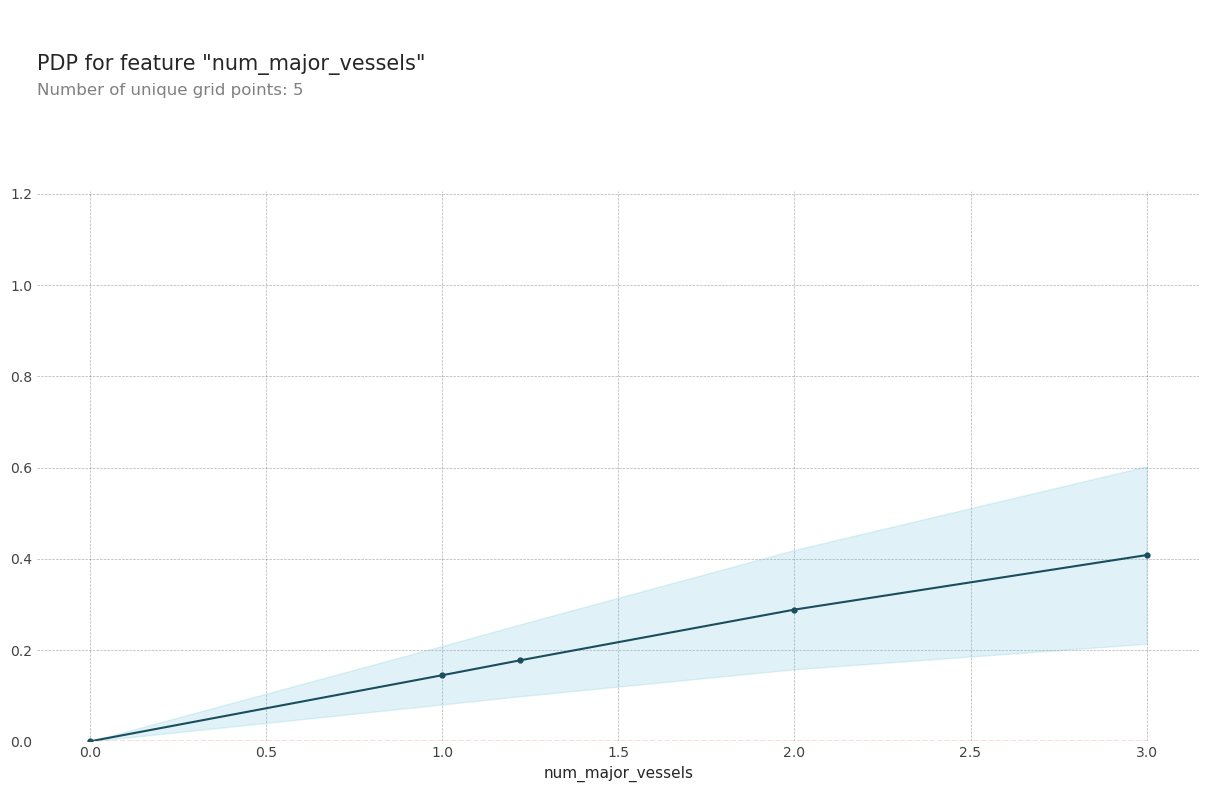

In [ ]:
base_features = dp.columns.values.tolist()
base_features.remove('target(HeartDisease)')

feat_name = 'num_major_vessels'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

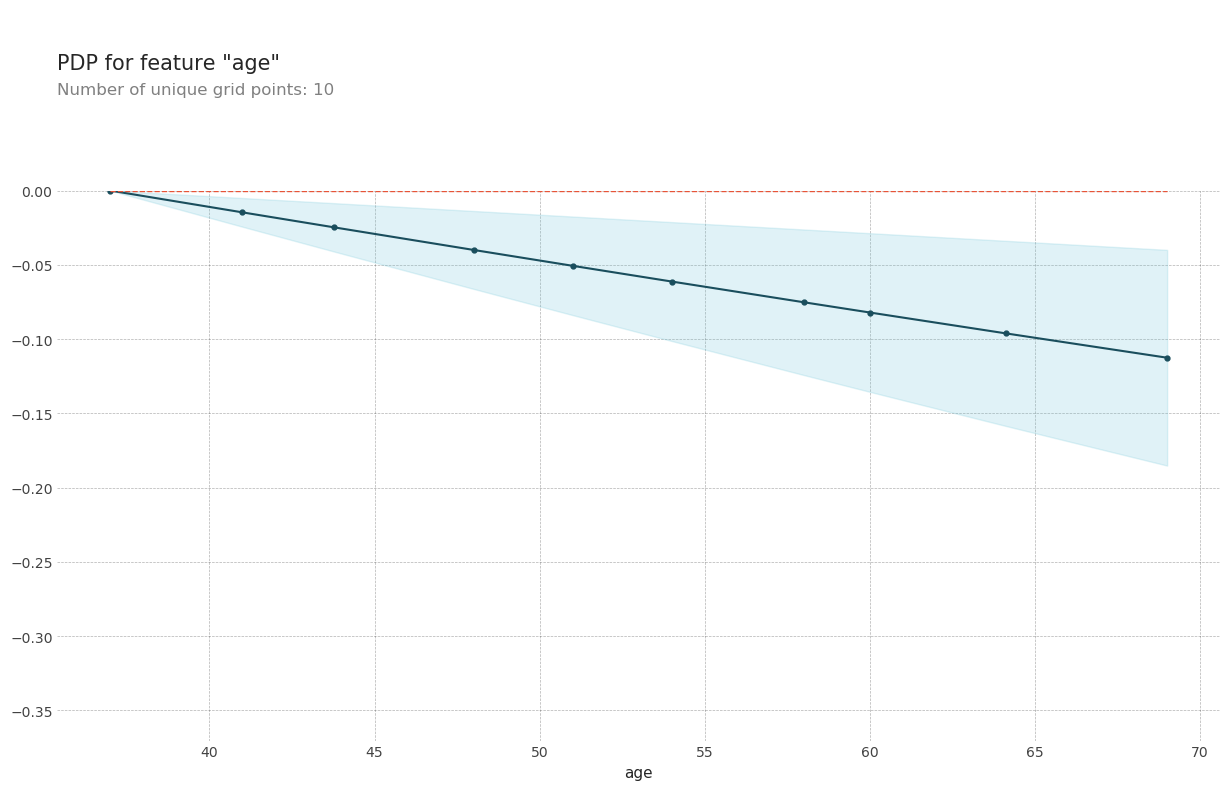

In [ ]:
feat_name = 'age'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()


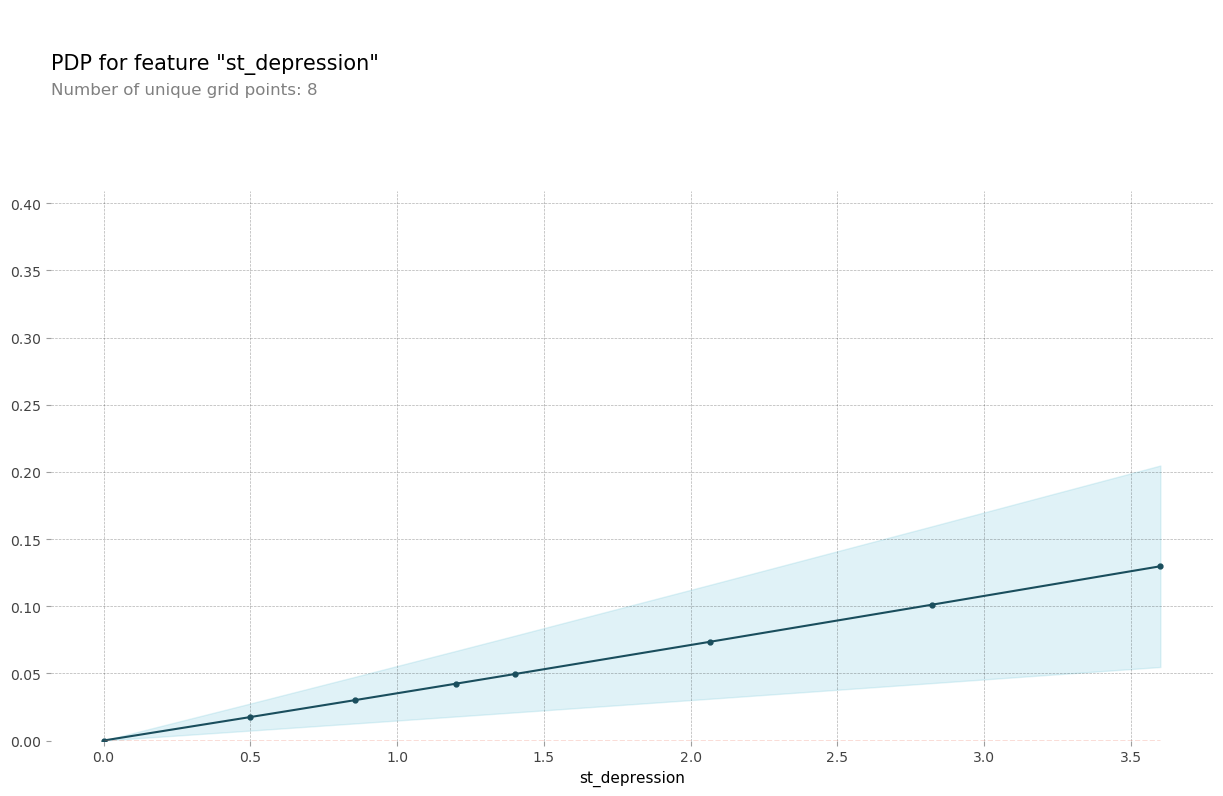

In [ ]:


feat_name = 'st_depression'
pdp_dist = pdp.pdp_isolate(model=model, dataset=X_test, model_features=base_features, feature=feat_name)

pdp.pdp_plot(pdp_dist, feat_name)
plt.show()

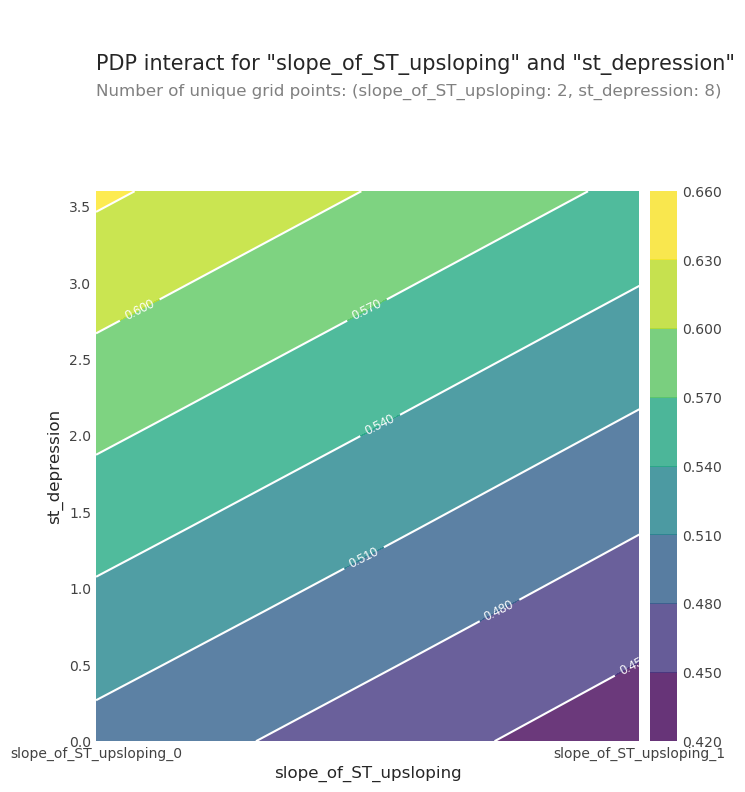

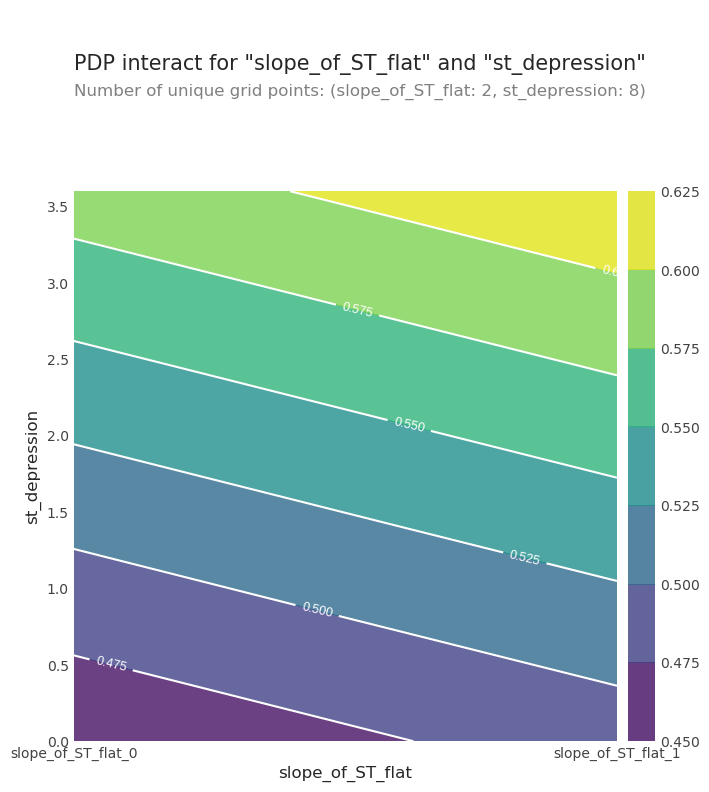

In [ ]:
inter1  =  pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features, features=['slope_of_ST_upsloping', 'st_depression'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['slope_of_ST_upsloping', 'st_depression'], plot_type='contour')
plt.show()

inter1  =  pdp.pdp_interact(model=model, dataset=X_test, model_features=base_features, features=['slope_of_ST_flat', 'st_depression'])

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=['slope_of_ST_flat', 'st_depression'], plot_type='contour')
plt.show()

Lets check Random Forest Classifier on the dataset.

In [133]:


model = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=10)



In [140]:
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=10, random_state=10)

In [141]:
y_pred = model.predict(X_test)

In [153]:
estimator = model.estimators_[0]



In [ ]:

export_graphviz(estimator, out_file='tree.dot', 
                feature_names=X.columns,
               class_names=['No Disease', 'Disease'],
                rounded=True, proportion=True, 
                label='root',
                precision=2, filled=True)
     


from subprocess import call
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

from IPython.display import Image
Image(filename = 'tree.png')

In [157]:
importances = model.feature_importances_

In [158]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})


In [159]:
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [160]:
print(feature_importances.head())

              Feature  Importance
16    thallium_normal    0.122824
5   num_major_vessels    0.122264
3      max_heart_rate    0.099749
2         cholesterol    0.098136
4       st_depression    0.090248


Lets check model accuracy.

In [ ]:
y_pred = model.predict(X_test)

# Convert predicted probabilities to class labels
y_pred_labels = [1 if pred >= 0.5 else 0 for pred in y_pred]



In [ ]:
cm = confusion_matrix(y_test, y_pred)


In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)


In [ ]:
sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])


In [ ]:
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)


Confusion Matrix:
[[21  5]
 [ 5 23]]
Accuracy: 0.8148148148148148
Precision: 0.8214285714285714
Recall: 0.8214285714285714
F1-score: 0.8214285714285714
Sensitivity: 0.8076923076923077
Specificity: 0.8214285714285714


In [ ]:

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.81      0.81        26
           1       0.82      0.82      0.82        28

    accuracy                           0.81        54
   macro avg       0.81      0.81      0.81        54
weighted avg       0.81      0.81      0.81        54



In [168]:
# Lets predict the likelihood of heart disease for each individual in the dataset
risk_scores = model.predict_proba(X)

In [169]:
dp['HeartDisease_Risk'] = risk_scores[:, 1]

In [170]:
at_risk_individuals = dp[dp['HeartDisease_Risk'] > 0.5]

In [ ]:
#Individuals at risk
print(at_risk_individuals)

In [172]:
# Analyzing the feature importances to determine the major causes of heart disease
major_causes = feature_importances['Feature'].head().tolist()
print("Major Causes of Heart Disease:", major_causes)

Major Causes of Heart Disease: ['thallium_normal', 'num_major_vessels', 'max_heart_rate', 'cholesterol', 'st_depression']


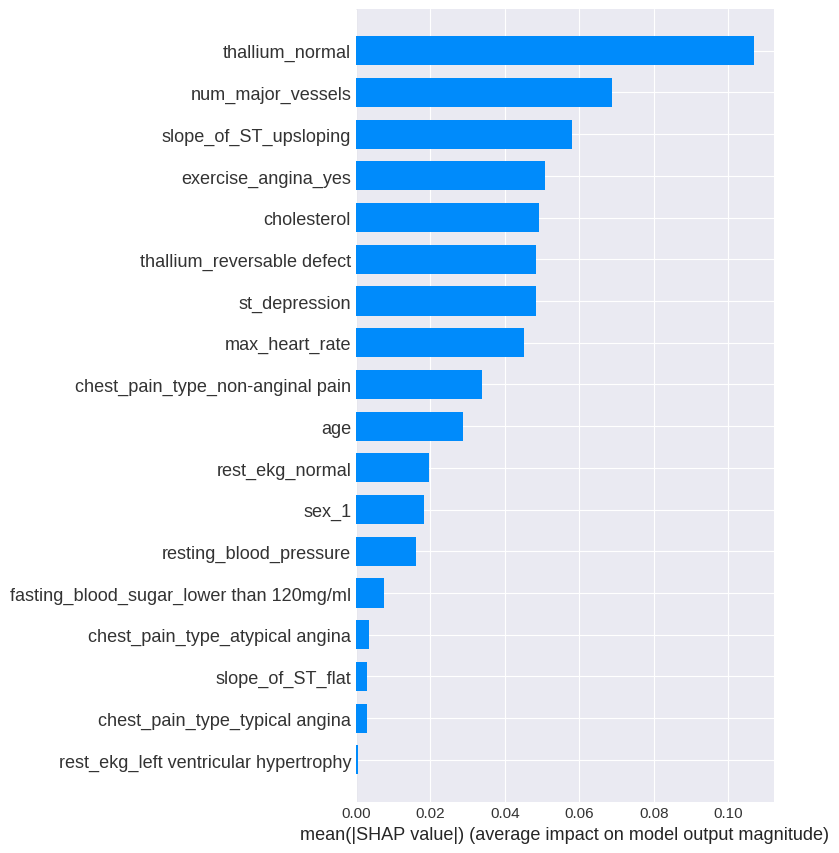

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

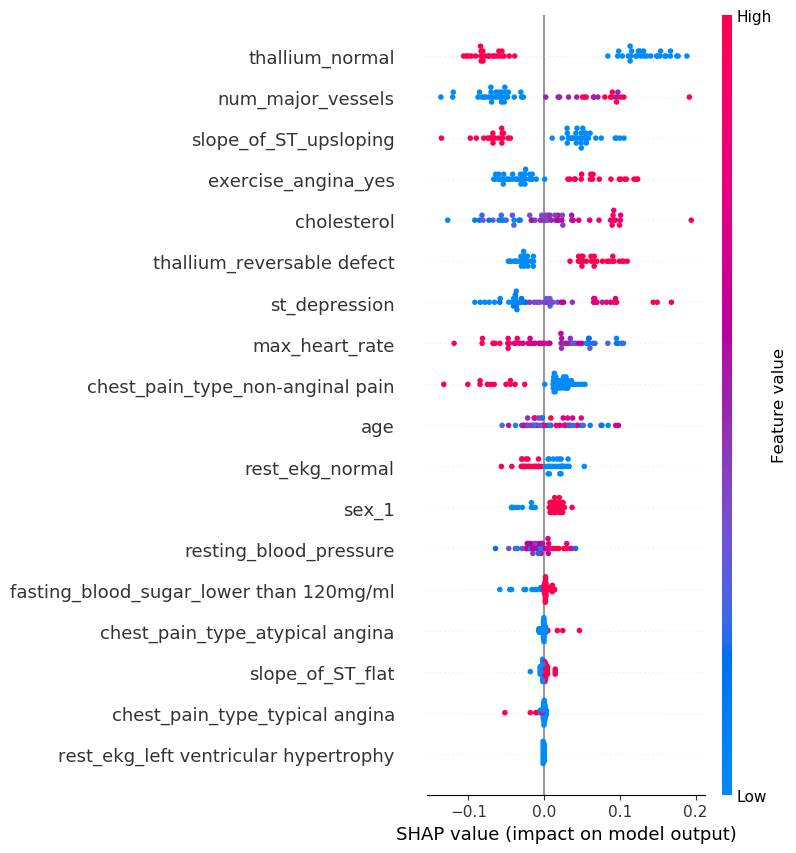

In [ ]:
shap.summary_plot(shap_values[1], X_test)

In [ ]:
def heart_disease_risk_pred(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [ ]:

data_for_prediction = X_test.iloc[5,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)



In [ ]:
data_for_prediction = X_test.iloc[12,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [ ]:
data_for_prediction = X_test.iloc[2,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [ ]:
data_for_prediction = X_test.iloc[7,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [ ]:
explainer = shap.Explainer(model)
shap_values = explainer.shap_values(X_test)

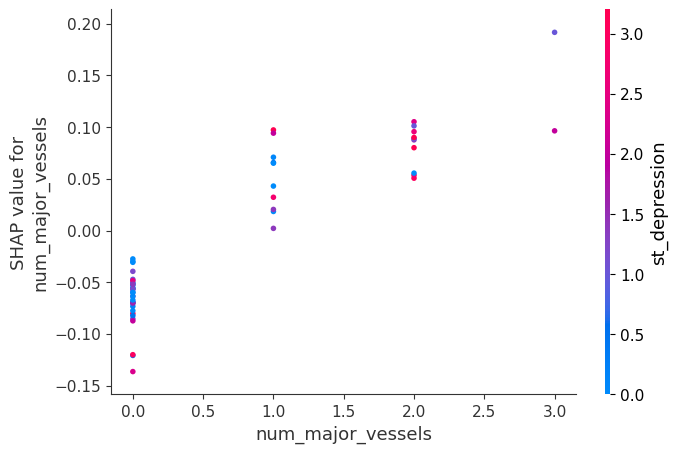

In [ ]:
shap.dependence_plot('num_major_vessels', shap_values[1], X_test, interaction_index="st_depression")

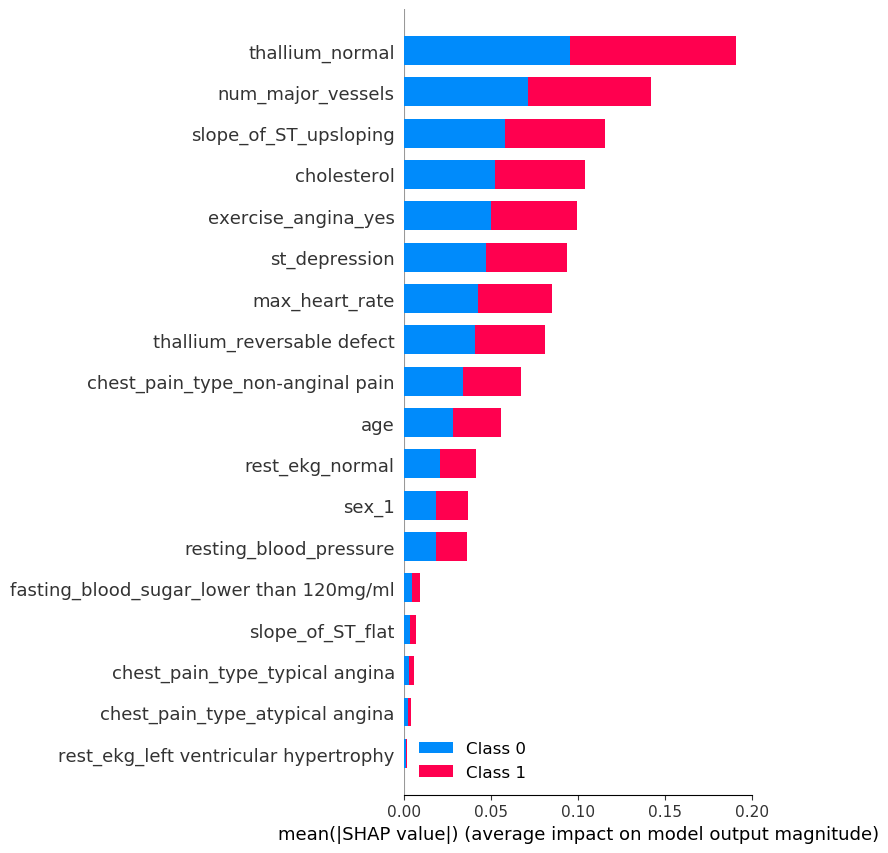

In [ ]:

shap_values = explainer.shap_values(X_train)
shap.summary_plot(shap_values, X_train)


Support Vector Machine




In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dp.drop('target(HeartDisease)', 1), dp['target(HeartDisease)'], test_size=0.2, random_state=10)

preprocessing the data by scaling the features.

In [189]:
X_train_encoded = pd.get_dummies(X_train)
X_test_encoded = pd.get_dummies(X_test)

In [190]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train_encoded)
X_test_imputed = imputer.transform(X_test_encoded)


In [191]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_imputed)
X_test_scaled = scaler.transform(X_test_imputed)

Radial basis function (RBF) kernel

In [203]:
model = SVC(kernel='rbf')  
model.fit(X_train, y_train)

SVC()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
sensitivity = cm[0, 0] / (cm[0, 0] + cm[1, 0])
specificity = cm[1, 1] / (cm[1, 1] + cm[0, 1])

In [ ]:
print('Confusion Matrix:')
print(cm)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Confusion Matrix:
[[21  5]
 [ 5 23]]
Accuracy: 0.6296296296296297
Precision: 0.8333333333333334
Recall: 0.35714285714285715
F1-score: 0.5
Sensitivity: 0.8076923076923077
Specificity: 0.8214285714285714


In [ ]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.57      0.92      0.71        26
           1       0.83      0.36      0.50        28

    accuracy                           0.63        54
   macro avg       0.70      0.64      0.60        54
weighted avg       0.71      0.63      0.60        54



In [ ]:
y_scores = svm_model.decision_function(X_test)

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

In [ ]:
roc_auc = auc(fpr, tpr)

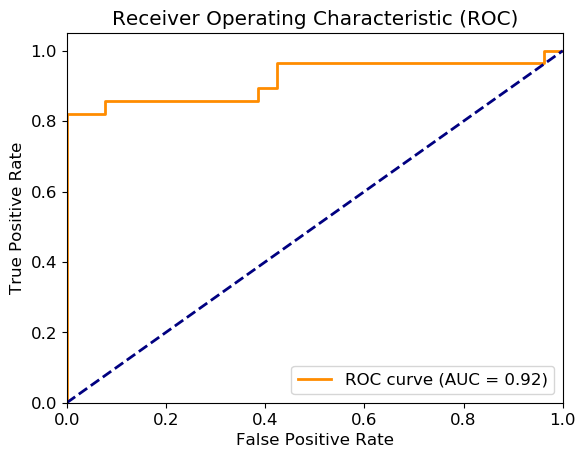

In [ ]:
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()

In [ ]:
from sklearn.model_selection import learning_curve

In [ ]:
print(dp)

In [ ]:

X = dp.drop('Heart Disease', axis=1)  
y = dp['Heart Disease']

In [ ]:
train_sizes = np.linspace(0.1, 1.0, 10)

In [ ]:
train_sizes, train_scores, test_scores = learning_curve(svm_model, X, y, train_sizes=train_sizes, cv=5)


In [ ]:
# Calculate the mean and standard deviation of the train and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

In [ ]:
plt.style.use('seaborn-darkgrid')
colors = ['tab:blue', 'tab:orange']

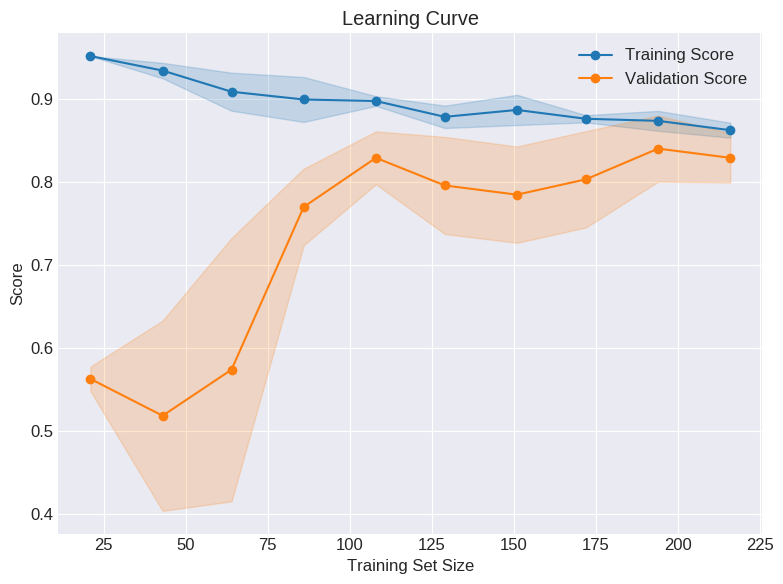

In [ ]:
# Plot the learning curve
plt.figure(figsize=(8, 6))
plt.plot(train_sizes, train_scores_mean, 'o-', color=colors[0], label='Training Score')
plt.plot(train_sizes, test_scores_mean, 'o-', color=colors[1], label='Validation Score')
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.2, color=colors[0])
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.2, color=colors[1])
plt.xlabel('Training Set Size')
plt.ylabel('Score')
plt.title('Learning Curve')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
X = dp.drop('target(HeartDisease)', axis=1)
y = dp['target(HeartDisease)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(dp.drop('target(HeartDisease)', 1), dp['target(HeartDisease)'], test_size=0.2, random_state=10)

In [210]:
dt_model = DecisionTreeClassifier()

In [ ]:
dt_model.fit(X_train, y_train)

In [212]:
importances = dt_model.feature_importances_

In [217]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

ValueError: ignored

In [216]:
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

ValueError: ignored

In [ ]:
y_pred = dt_classifier.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7037037037037037


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
sensitivity = confusion[0, 0] / (confusion[0, 0] + confusion[1, 0])
specificity = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])

In [ ]:
print('Confusion Matrix:')
print(confusion)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Confusion Matrix:
[[15 11]
 [ 5 23]]
Accuracy: 0.7037037037037037
Precision: 0.6764705882352942
Recall: 0.8214285714285714
F1-score: 0.7419354838709677
Sensitivity: 0.75
Specificity: 0.6764705882352942


In [ ]:
# Train the decision tree model
dt_model = DecisionTreeClassifier(random_state=10)
dt_model.fit(X_train, y_train)

In [ ]:
feature_importance = dt_model.feature_importances_
print("Feature Importance:")
for feature, importance in zip(X.columns, feature_importance):
    print(f"{feature}: {importance}")

Feature Importance:
age: 0.08986749309291846
resting_blood_pressure: 0.08626101826842769
cholesterol: 0.0912531855766133
max_heart_rate: 0.09319418058700966
st_depression: 0.13512834808340632
num_major_vessels: 0.0647133065915516
sex_1: 0.014200561009817671
chest_pain_type_atypical angina: 0.02299138449208576
chest_pain_type_non-anginal pain: 0.014200561009817671
chest_pain_type_typical angina: 0.0
fasting_blood_sugar_lower than 120mg/ml: 0.014200561009817671
rest_ekg_left ventricular hypertrophy: 0.0
rest_ekg_normal: 0.010650420757363254
exercise_angina_yes: 0.06095491114775827
slope_of_ST_flat: 0.0
slope_of_ST_upsloping: 0.0
thallium_normal: 0.2855537738432584
thallium_reversable defect: 0.016830294530154277


In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
X = dp.drop('target(HeartDisease)', axis=1)
y = dp['target(HeartDisease)']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
model = MLPClassifier(hidden_layer_sizes=(100, 100), activation='relu', solver='adam', random_state=10)


In [ ]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(100, 100), random_state=10)

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)

In [ ]:
print("Predictions:", y_pred)
print("Accuracy:", accuracy)

Predictions: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.48148148148148145


In [ ]:
confusion = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
confusion = confusion_matrix(y_test, y_pred)
sensitivity = confusion[0, 0] / (confusion[0, 0] + confusion[1, 0])
specificity = confusion[1, 1] / (confusion[1, 1] + confusion[0, 1])

In [ ]:
print('Confusion Matrix:')
print(confusion)
print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1)
print('Sensitivity:', sensitivity)
print('Specificity:', specificity)

Confusion Matrix:
[[32  1]
 [11 10]]
Accuracy: 0.48148148148148145
Precision: 0.9090909090909091
Recall: 0.47619047619047616
F1-score: 0.6249999999999999
Sensitivity: 0.7441860465116279
Specificity: 0.9090909090909091


In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [ ]:
base_estimator = DecisionTreeClassifier()

In [ ]:
bagging = BaggingClassifier(base_estimator=base_estimator, n_estimators=10, random_state=10)

In [ ]:
bagging.fit(X_train, y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=DecisionTreeClassifier(), random_state=10)

In [ ]:
y_pred = bagging.predict(X_test)

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.7962962962962963


In [ ]:
from sklearn.model_selection import GridSearchCV, cross_val_score

In [ ]:
param_grid = {
    'n_estimators': [10, 50, 100],
    'max_samples': [0.5, 0.7, 1.0],
    'base_estimator__max_depth': [None, 3, 5]
}

In [ ]:
grid_search = GridSearchCV(estimator=bagging, param_grid=param_grid, cv=5)
nested_scores = cross_val_score(grid_search, X, y, cv=5)

In [128]:
# Print the average score and standard deviation
print("Nested CV Accuracy: {:.2f} +/- {:.2f}".format(nested_scores.mean(), nested_scores.std()))


Nested CV Accuracy: 0.81 +/- 0.06


In [166]:
from sklearn.ensemble import ExtraTreesClassifier